<a href="https://colab.research.google.com/github/rkdcodms/CTSP/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


left exists: True
right exists: True
left loaded: True shape: (1408, 1408, 3)
right loaded: True shape: (1408, 1408, 3)
Showing with cv2_imshow:


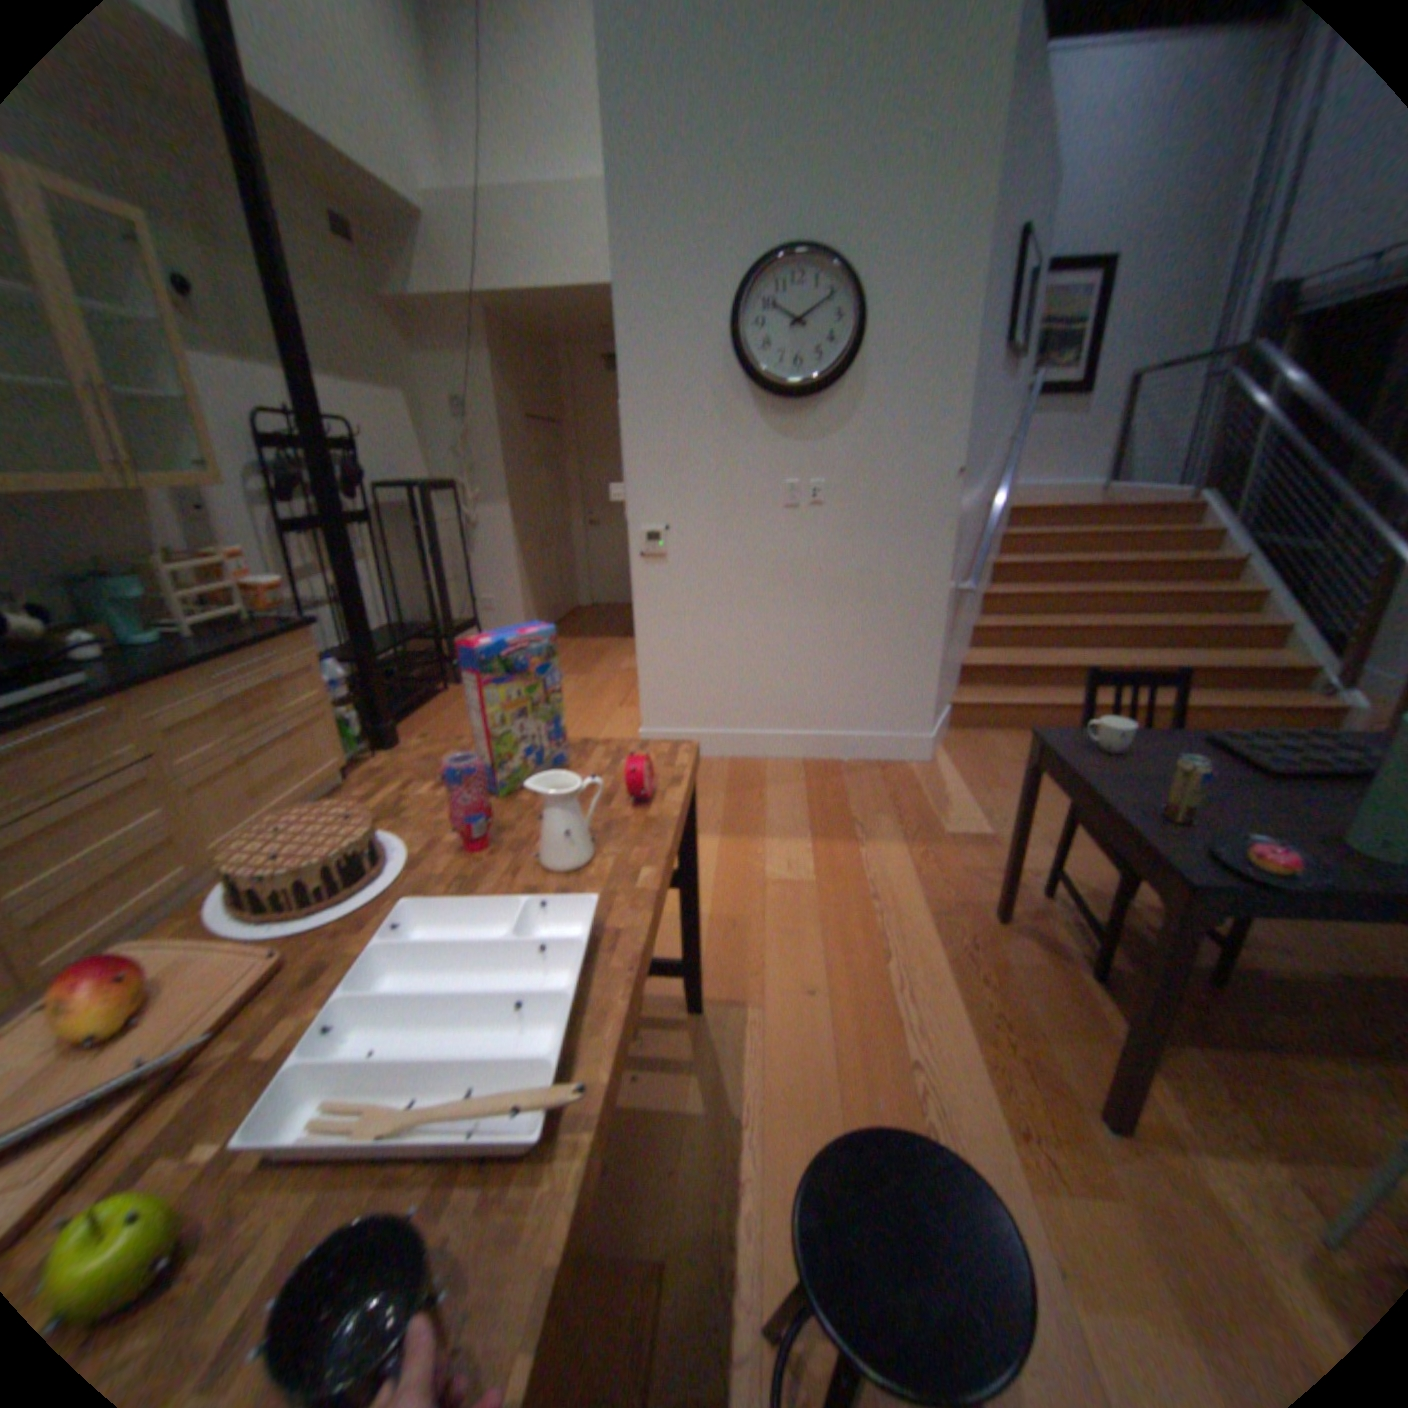

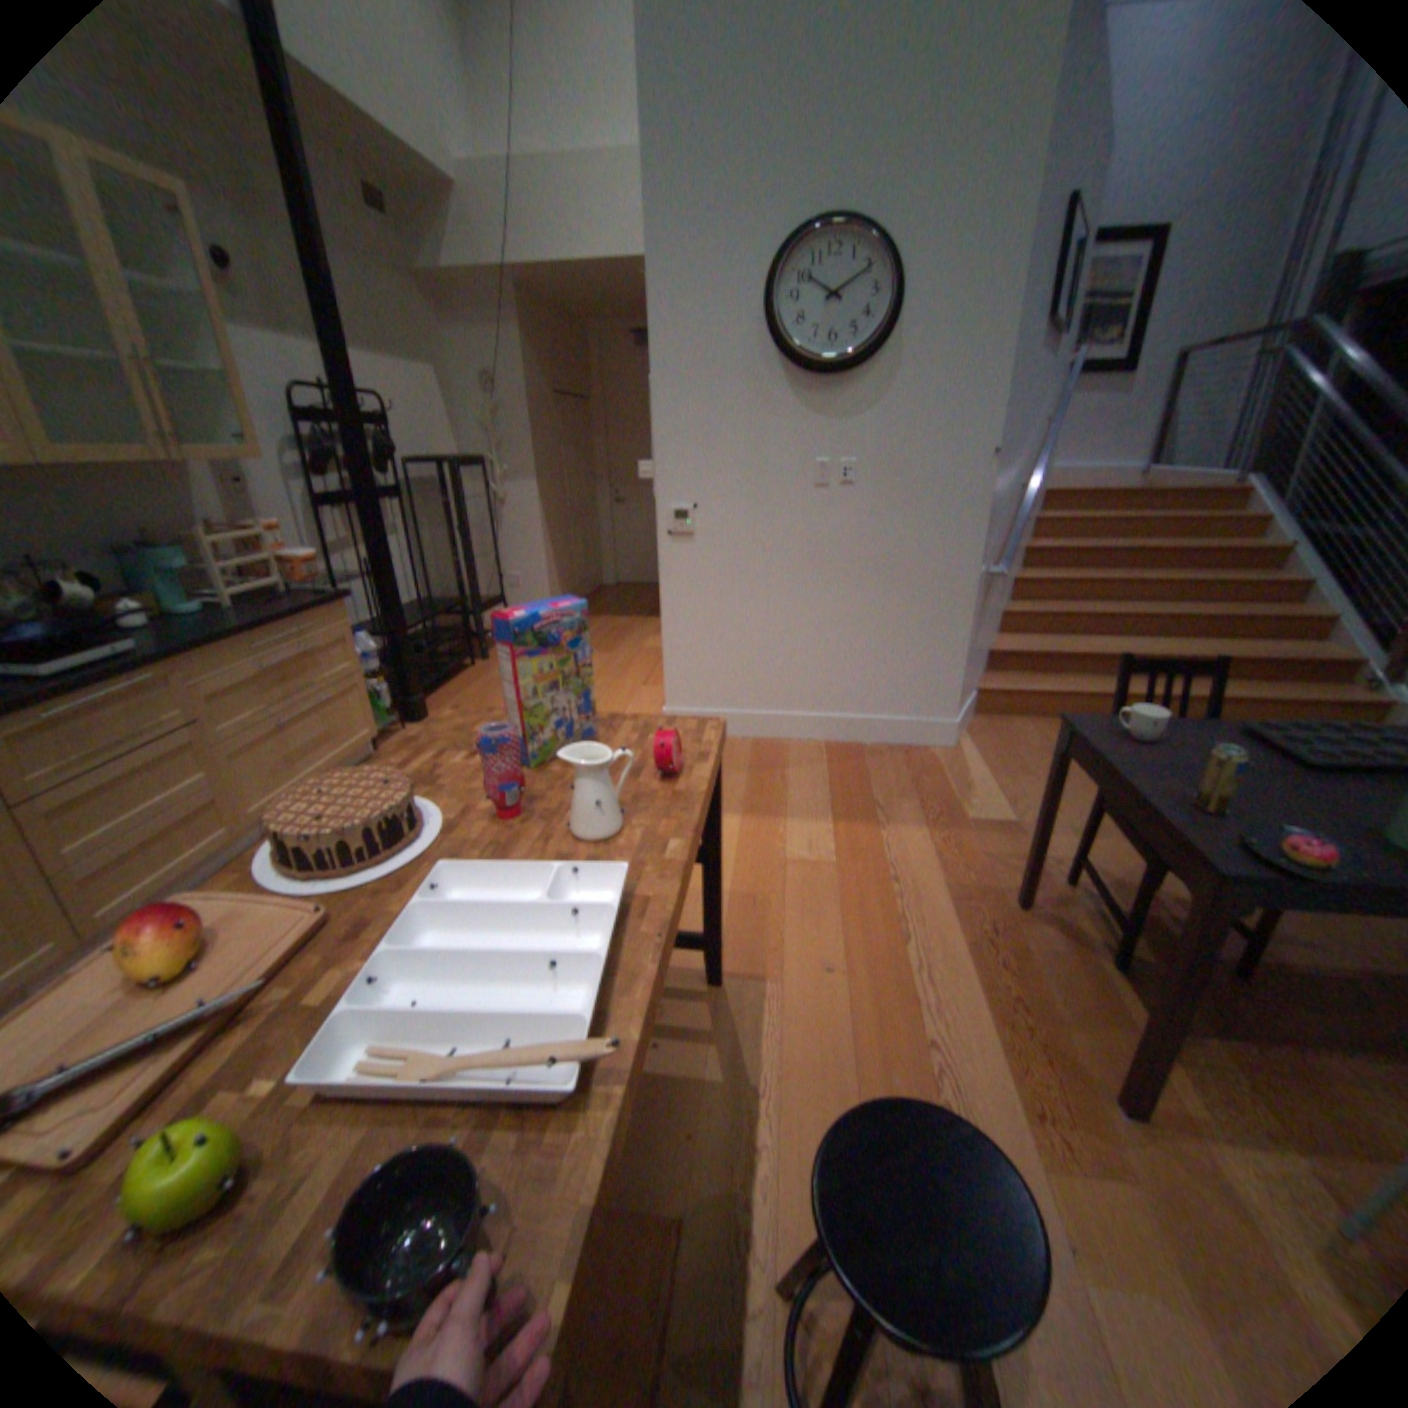

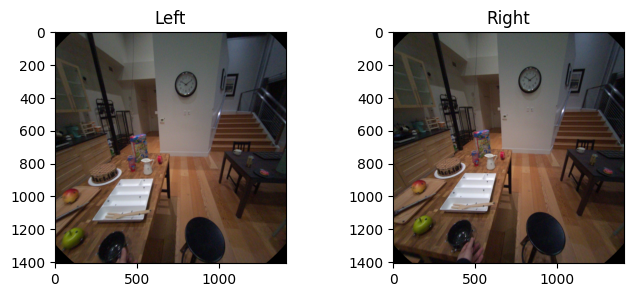

✅ saved: /content/drive/MyDrive/disparity_colorized.jpeg


In [4]:
import os, cv2, numpy as np
from google.colab.patches import cv2_imshow  # 콜랩 전용
import matplotlib.pyplot as plt

left_path  = "/content/drive/MyDrive/left.mfcd#camera-rgb+images_0.jpeg"
right_path = "/content/drive/MyDrive/right.jpeg"

# 0) 경로/읽기 확인
print("left exists:", os.path.exists(left_path))
print("right exists:", os.path.exists(right_path))

left  = cv2.imread(left_path)
right = cv2.imread(right_path)
print("left loaded:", left is not None, "shape:", None if left is None else left.shape)
print("right loaded:", right is not None, "shape:", None if right is None else right.shape)

# 경로 문제면 여기서 바로 멈추기
assert left is not None, "left 이미지를 못 불러왔어요. 경로/파일명 확인하세요."
assert right is not None, "right 이미지를 못 불러왔어요. 경로/파일명 확인하세요."

# 1) 화면에 표시 (cv2_imshow 또는 matplotlib)
print("Showing with cv2_imshow:")
cv2_imshow(left); cv2_imshow(right)

# (또는)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB)); plt.title("Left")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB)); plt.title("Right")
plt.show()

# 2) 흑백 변환
grayL = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

# 3) 간단한 SGBM으로 disparity 계산 (HomoDepth 대신 프리뷰용)
stereo = cv2.StereoSGBM_create(numDisparities=128, blockSize=5)
disp = stereo.compute(grayL, grayR).astype(np.float32)/16.0

# 4) 색상화 + 저장
disp_norm  = cv2.normalize(disp, None, 0, 255, cv2.NORM_MINMAX)
disp_color = cv2.applyColorMap(np.uint8(disp_norm), cv2.COLORMAP_JET)

save_path = "/content/drive/MyDrive/disparity_colorized.jpeg"
cv2.imwrite(save_path, disp_color)
print("✅ saved:", save_path)